# Kuntadatan tutkimista

Tilastokeskuksen verkkosivuilta ladatussa tiedostossa Suomen kuntien väkiluvut

In [3]:
import pandas as pd

In [4]:
# ladataan data, jätetään pois ensimmäinen rivi, joka ei kuulu taulukkoon

df = pd.read_csv('Kuntien_avainluvut_2020_1.csv', sep=';', skiprows=1, encoding='iso8859_15')
df.head()

,Alue 2019,Tiedot,2018
0,Akaa,Väkiluku,16611
1,Alajärvi,Väkiluku,9700
2,Alavieska,Väkiluku,2573
3,Alavus,Väkiluku,11544
4,Asikkala,Väkiluku,8149


In [5]:
df.tail(10)

,Alue 2019,Tiedot,2018
390,Kajaanin seutukunta,Väkiluku,51986
391,Rovaniemen seutukunta,Väkiluku,66818
392,Kemi-Tornion seutukunta,Väkiluku,57150
393,Torniolaakson seutukunta,Väkiluku,7460
394,Itä-Lapin seutukunta,Väkiluku,16067
395,Tunturi-Lapin seutukunta,Väkiluku,14421
396,Pohjois-Lapin seutukunta,Väkiluku,16606
397,Mariehamns stad,Väkiluku,11743
398,Ålands landsbygd,Väkiluku,15973
399,Ålands skärgård,Väkiluku,2073


In [6]:
# katsotaan datan koko
df.shape

(400, 3)

In [7]:
# väkilukusarakkeen tietoja

df['2018'].describe()

count    4.000000e+02
mean     4.138439e+04
std      1.330630e+05
min      9.100000e+01
25%      3.333500e+03
50%      8.545500e+03
75%      2.469100e+04
max      1.671024e+06
Name: 2018, dtype: float64

In [8]:
df['2018'].mean()

41384.3925

In [9]:
# alle 1000 asukkaan kunnat

df[df['2018'] < 1000]

,Alue 2019,Tiedot,2018
7,Brändö,Väkiluku,449
8,Eckerö,Väkiluku,961
17,Föglö,Väkiluku,534
18,Geta,Väkiluku,514
21,Hailuoto,Väkiluku,974
113,Kumlinge,Väkiluku,315
117,Kustavi,Väkiluku,926
122,Kökar,Väkiluku,236
136,Lestijärvi,Väkiluku,737
145,Luhanka,Väkiluku,707


In [10]:
# yli 150000 asukkaan kunnat

df[df['2018'] > 150000]

,Alue 2019,Tiedot,2018
11,Espoo,Väkiluku,283632
33,Helsinki,Väkiluku,648042
180,Oulu,Väkiluku,203567
268,Tampere,Väkiluku,235239
276,Turku,Väkiluku,191331
291,Vantaa,Väkiluku,228166
311,Uudenmaan maakunta,Väkiluku,1671024
312,Varsinais-Suomen maakunta,Väkiluku,478582
313,Satakunnan maakunta,Väkiluku,218624
314,Kanta-Hämeen maakunta,Väkiluku,171364


In [11]:
# datassa olikin sekä kuntia että maakuntia yms., joten erotetaan kunnat omaksi dataframeksi
# vaihdetaan ensin indeksiksi paikannimi

df.set_index('Alue 2019', inplace=True)

df.head()

,Tiedot,2018
Alue 2019,,
Akaa,Väkiluku,16611
Alajärvi,Väkiluku,9700
Alavieska,Väkiluku,2573
Alavus,Väkiluku,11544
Asikkala,Väkiluku,8149


In [12]:
#  ja jätetään pois turha Tiedot-sarake

df.drop(columns='Tiedot', inplace=True)
df.head()

,2018
Alue 2019,
Akaa,16611
Alajärvi,9700
Alavieska,2573
Alavus,11544
Asikkala,8149


In [13]:
# kunnat-dataframeen kunnat Akaasta Äänekoskelle

kunnat = df['Akaa':'Äänekoski']
kunnat.tail()

,2018
Alue 2019,
Ylivieska,15212
Ylöjärvi,32983
Ypäjä,2357
Ähtäri,5703
Äänekoski,18851


In [14]:
# katsotaan uudelleen tilastot

kunnat.describe()

,2018
count,311.000000
mean,17742.504823
std,48795.634260
min,91.000000
25%,2722.500000
50%,6081.000000
75%,14638.000000
max,648042.000000


In [15]:
# katsotaan uudelleen isoimmat kunnat, lasketaan raja 100 000:een

kunnat[kunnat['2018'] > 100000]

,2018
Alue 2019,
Espoo,283632
Helsinki,648042
Jyväskylä,141305
Kuopio,118664
Lahti,119951
Oulu,203567
Tampere,235239
Turku,191331
Vantaa,228166


In [16]:
# mitkä kunnat ovat lähellä keskiarvoa?

mean = kunnat['2018'].mean()


mean_mask = (kunnat['2018'] > mean - 1500) & (kunnat['2018'] < mean + 1500)

kunnat[mean_mask]

,2018
Alue 2019,
Akaa,16611
Forssa,17028
Heinola,18889
Janakkala,16447
Kempele,17923
Laukaa,18927
Pieksämäki,17933
Äänekoski,18851


In [17]:
# alle 20 000 asukkaan kuntien määrä

pienten_maara = kunnat[kunnat['2018'] < 20000]['2018'].count()
pienten_maara

255

In [33]:
# alle 20 000 asukkaan kuntien osuus kaikista kunnista

pienten_osuus = pienten_maara / kunnat['2018'].count()
"{:.0%}".format(pienten_osuus)

'82%'

In [19]:
# suurimmat 5 kuntaa

isot = kunnat.sort_values('2018', ascending=False).iloc[:5]
isot

,2018
Alue 2019,
Helsinki,648042
Espoo,283632
Tampere,235239
Vantaa,228166
Oulu,203567


In [20]:
# 5 suurimman kunnan väestön osuus koko väestöstä

isot['2018'].sum() / kunnat['2018'].sum()

0.28971900457400696

In [21]:
# montako pienimmistä kunnista mahtuisi suurimpaan (Helsinkiin)?
# Helsingin väkiluku

hel = kunnat['2018'].max()
hel

648042

In [22]:
laskuri = 1
summa = 0
kunnat_kokojarj = kunnat.sort_values('2018')

while summa <= hel:
    summa = kunnat_kokojarj['2018'].iloc[:laskuri].sum()
    
    laskuri += 1

print(f'summa, joka menee yli: {summa}')
print(f'laskuri: {laskuri}')

mahtuu = kunnat_kokojarj.iloc[:laskuri - 2] # pitää vähentää 2, koska yli menon jälkeen laskuriin on vielä lisätty 1
mahtuu

summa, joka menee yli: 655511
laskuri: 186


,2018
Alue 2019,
Sottunga,91
Kökar,236
Kumlinge,315
Lumparland,382
Vårdö,448
...,...
Kemijärvi,7370
Oulainen,7430
Uusikaarlepyy,7455


In [23]:
# tilastoja

mahtuu.describe()

,2018
count,184.000000
mean,3519.836957
std,1969.827560
min,91.000000
25%,2007.500000
50%,3113.500000
75%,4993.000000
max,7766.000000


In [24]:
# tarkistetaan vielä, että pikkukylien väestön summa on enintään sama kuin Helsingin 648042

mahtuu['2018'].sum()

647650

## piirretään joitakin kaavioita

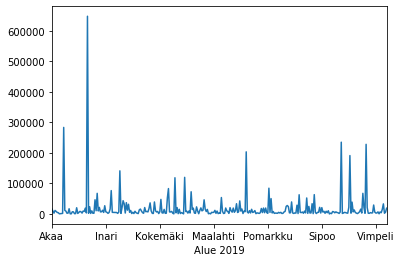

In [41]:
# pandasin plot-komento oletusarvoilla ilman mitään säätöjä:
# saadaan käppyrä, jossa kunnat x-akselilla ja asukasmäärä y-akselilla

kunnat['2018'].plot()

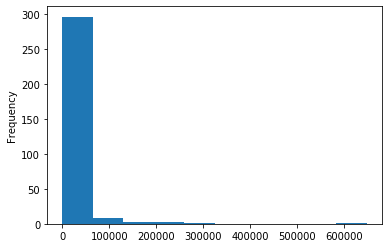

In [43]:
# jos tehdään histogrammi, x-akselilla on kunnat ryhmiteltyinä koon mukaan ja y-akselilla kuntien määrä

kunnat['2018'].plot(kind='hist')

In [46]:
# jaetaan kunnat itse tasakokoisiin ryhmiin koon mukaan: .qcut()

pd.qcut(kunnat['2018'], q=10).value_counts()

(90.999, 1584.0]       32
(33611.0, 648042.0]    31
(18889.0, 33611.0]     31
(10389.0, 18889.0]     31
(7990.0, 10389.0]      31
(6081.0, 7990.0]       31
(4482.0, 6081.0]       31
(3146.0, 4482.0]       31
(2287.0, 3146.0]       31
(1584.0, 2287.0]       31
Name: 2018, dtype: int64

In [48]:
# tallennetaan ryhmätieto dataframeen uuteen sarakkeeseen

kunnat['kvantiili'] = pd.qcut(kunnat['2018'], q=10)
kunnat.head()

/home/pomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,2018,kvantiili
Alue 2019,,
Akaa,16611,"(10389.0, 18889.0]"
Alajärvi,9700,"(7990.0, 10389.0]"
Alavieska,2573,"(2287.0, 3146.0]"
Alavus,11544,"(10389.0, 18889.0]"
Asikkala,8149,"(7990.0, 10389.0]"


In [53]:
kunnat.groupby('kvantiili').describe()

2018                                                   \
                    count           mean            std      min       25%   
kvantiili                                                                    
(90.999, 1584.0]     32.0     997.093750     435.213434     91.0    663.75   
(1584.0, 2287.0]     31.0    1995.516129     199.995812   1615.0   1871.00   
(2287.0, 3146.0]     31.0    2753.032258     263.094341   2299.0   2562.00   
(3146.0, 4482.0]     31.0    3802.806452     428.095427   3150.0   3433.50   
(4482.0, 6081.0]     31.0    5131.290323     380.147006   4498.0   4827.00   
(6081.0, 7990.0]     31.0    6944.967742     523.078036   6134.0   6552.50   
(7990.0, 10389.0]    31.0    9212.580645     744.152573   8058.0   8430.50   
(10389.0, 18889.0]   31.0   14230.451613    2605.543460  10510.0  11745.50   
(18889.0, 33611.0]   31.0   24047.483871    4883.622732  18927.0  20636.50   
(33611.0, 648042.0]  31.0  108850.000000  120798.686102  36254.0  46400.00   

                                                  
                         50%       75%       max  
kvantiili                                         
(90.999, 1584.0]      1065.5    1345.5    1584.0  
(1584.0, 2287.0]      2028.0    2149.0    2287.0  
(2287.0, 3146.0]      2743.0    2992.0    3146.0  
(3146.0, 4482.0]      3834.0    4042.0    4482.0  
(4482.0, 6081.0]      5099.0    5371.5    6081.0  
(6081.0, 7990.0]      6811.0    7298.0    7990.0  
(7990.0, 10389.0]     9454.0    9731.0   10389.0  
(10389.0, 18889.0]   14849.0   16061.5   18889.0  
(18889.0, 33611.0]   21674.0   27262.0   33611.0  
(33611.0, 648042.0]  63288.0  119307.5  648042.0

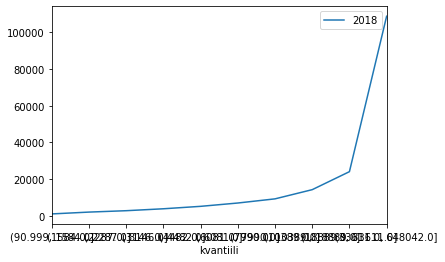

In [60]:
# ryhmien väestön keskiarvot kaaviossa (en nyt puutu x-akselin otsikoihin, vaikkei niistä saakaan tolkkua)

kunnat.groupby('kvantiili').mean().plot()

In [69]:
# ehkä saadaan mielenkiintoisempi kaavio jakamalla kaupungit ryhmiin väestörajojen mukaan: .cut()

pd.cut(kunnat['2018'], bins=10)

Alue 2019
Akaa         (-556.951, 64886.1]
Alajärvi     (-556.951, 64886.1]
Alavieska    (-556.951, 64886.1]
Alavus       (-556.951, 64886.1]
Asikkala     (-556.951, 64886.1]
                    ...         
Ylivieska    (-556.951, 64886.1]
Ylöjärvi     (-556.951, 64886.1]
Ypäjä        (-556.951, 64886.1]
Ähtäri       (-556.951, 64886.1]
Äänekoski    (-556.951, 64886.1]
Name: 2018, Length: 311, dtype: category
Categories (10, interval[float64]): [(-556.951, 64886.1] < (64886.1, 129681.2] < (129681.2, 194476.3] < (194476.3, 259271.4] ... (388861.6, 453656.7] < (453656.7, 518451.8] < (518451.8, 583246.9] < (583246.9, 648042.0]]

In [63]:
# tallennetaan taas dataframeen

kunnat['jako2'] = pd.cut(kunnat['2018'], bins=10)
kunnat.head()

/home/pomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,2018,kvantiili,jako2
Alue 2019,,,
Akaa,16611,"(10389.0, 18889.0]","(-556.951, 64886.1]"
Alajärvi,9700,"(7990.0, 10389.0]","(-556.951, 64886.1]"
Alavieska,2573,"(2287.0, 3146.0]","(-556.951, 64886.1]"
Alavus,11544,"(10389.0, 18889.0]","(-556.951, 64886.1]"
Asikkala,8149,"(7990.0, 10389.0]","(-556.951, 64886.1]"


In [72]:
# tarkistetaan kuntien jakautuminen ryhmiin

kunnat.groupby('jako2').count()

,2018,kvantiili
jako2,,
"(-556.951, 64886.1]",296,296
"(64886.1, 129681.2]",8,8
"(129681.2, 194476.3]",2,2
"(194476.3, 259271.4]",3,3
"(259271.4, 324066.5]",1,1
"(324066.5, 388861.6]",0,0
"(388861.6, 453656.7]",0,0
"(453656.7, 518451.8]",0,0
"(518451.8, 583246.9]",0,0


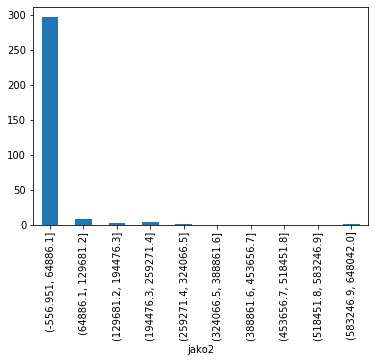

In [79]:
# ja näytetään vielä jakautuminen kaaviona

kunnat.groupby('jako2')['2018'].count().plot(kind='bar')

In [ ]:
# tästä näkyy hyvin se, että pieniä kuntia on paljon, keskikokoisia melko vähän ja Helsinki
# on ylhäisessä yksinäisyydessään